In [1]:
import numpy as np
import pandas as pd
import gc
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/valkyrie/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
columns=["sentiment", "ids", "date", "flag", "user", "text"]
data=pd.read_csv('../Dataset/raw/data.csv',names=columns,encoding='ISO-8859-1')

In [3]:
data=data[["text","sentiment"]]
data.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [4]:
gc.collect()

20

In [5]:
data.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

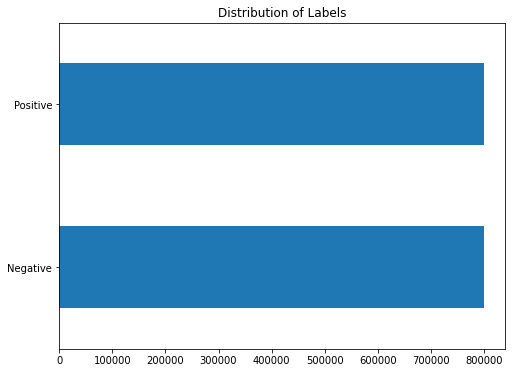

In [4]:
ax=data.sentiment.value_counts().plot(kind='barh',figsize=(8,6),title="Distribution of Labels")
ax.set_yticklabels(['Negative','Positive'], rotation=0)


In [5]:
#Converting Tweets to LowerCase
data["text"]=data.text.str.lower()

#Replacing Links with "URL"
data["text"]=data["text"].str.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

#Removing the Usernames
data["text"]=data["text"].str.replace(r'@[^\s]+',"")

#Removing all Non Alpha Numeric Characters
data["text"]=data["text"].str.replace(r'[^A-Za-z0-9 ]+',"")

#Removng Stopwords
stop_words = stopwords.words('english') 
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# df[''] = df['Links'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [6]:
data.head()

,text,sentiment
0,URL awww thats bummer shoulda got david carr t...,0
1,upset cant update facebook texting might cry r...,0
2,dived many times ball managed save 50 rest go ...,0
3,whole body feels itchy like fire,0
4,behaving im mad cant see,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'],test_size = 0.10, random_state = 0)

In [8]:
X_train.shape,X_test.shape

((1440000,), (160000,))

In [9]:
#Vectorsing the Tweets
vectorizer=TfidfVectorizer(max_df=0.9,min_df=20,max_features=20000,ngram_range=(1,2))
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=20000,
                min_df=20, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [10]:
print ("Vocab Size:",len(vectorizer.get_feature_names()))

Vocab Size: 20000


In [11]:
# Applyting TF-ID
X_train=vectorizer.transform(X_train)
X_test=vectorizer.transform(X_test)

In [12]:
X_train.shape

(1440000, 20000)

In [13]:
#Training Logitistic Regression
lr=LogisticRegression(verbose=3)
lr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=3,
                   warm_start=False)

In [14]:
pred=lr.predict(X_test)
acc=accuracy_score(y_test,pred)
f1=f1_score(y_test,pred,pos_label=4)
confussion=confusion_matrix(y_test,pred,labels=[0,4])

In [15]:
acc,f1

(0.790925, 0.7956306053126757)

Text(0.5, 1.05, 'Confussion Matrix')

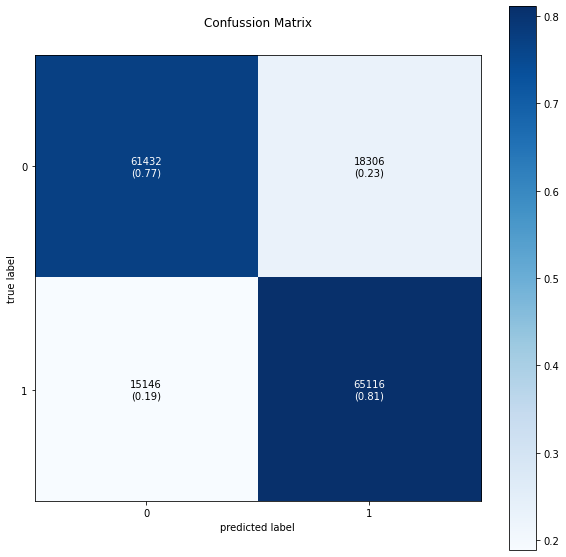

In [16]:
fig, ax = plot_confusion_matrix(conf_mat=confussion,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                               figsize=(10,10))
plt.title('Confussion Matrix')

In [17]:
def preprocess(tweet):
    #LowerCase 
    tweet=tweet.lower()

    #Replacing URL
    tweet=tweet.replace(r'https?://[^\s<>"]+|www\.[^\s<>"]+', "URL")

    #Removing Username
    tweet=tweet.replace(r'@[^\s]+',"")

    #Removing Non-Alpha Numeric Chars
    tweet=tweet.replace(r'[^A-Za-z0-9 ]+',"")


    stop_words = stopwords.words('english') 
    text_tokens = word_tokenize(tweet)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)

    return filtered_sentence

In [18]:
#Testing 
tweet="Trump should apologize. He is to blame"
tweet=preprocess(tweet)
tweet=vectorizer.transform([tweet])
lr.predict(tweet)

array([4])

[nltk_data] Downloading package punkt to /home/valkyrie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
from textblob import TextBlob
testimonial = TextBlob("this notebook helps you to understand. It is so good")
testimonial.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores("trump should apologize. he is over his head")
vs

{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.1027}